<a href="https://colab.research.google.com/github/DreamingNight/BookxNoteData/blob/master/chapter02/Chapter%202%20-%20Tokens%20and%20Token%20Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Chapter 2 - Tokens and Token Embeddings</h1>
<i>Exploring tokens and embeddings as an integral part of building LLMs</i>


<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961"><img src="https://img.shields.io/badge/Buy%20the%20Book!-grey?logo=amazon"></a>
<a href="https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/"><img src="https://img.shields.io/badge/O'Reilly-white.svg?logo=data:image/svg%2bxml;base64,PHN2ZyB3aWR0aD0iMzQiIGhlaWdodD0iMjciIHZpZXdCb3g9IjAgMCAzNCAyNyIgZmlsbD0ibm9uZSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj4KPGNpcmNsZSBjeD0iMTMiIGN5PSIxNCIgcj0iMTEiIHN0cm9rZT0iI0Q0MDEwMSIgc3Ryb2tlLXdpZHRoPSI0Ii8+CjxjaXJjbGUgY3g9IjMwLjUiIGN5PSIzLjUiIHI9IjMuNSIgZmlsbD0iI0Q0MDEwMSIvPgo8L3N2Zz4K"></a>
<a href="https://github.com/HandsOnLLM/Hands-On-Large-Language-Models"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter02/Chapter%202%20-%20Tokens%20and%20Token%20Embeddings.ipynb)

---

This notebook is for Chapter 2 of the [Hands-On Large Language Models](https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961) book by [Jay Alammar](https://www.linkedin.com/in/jalammar) and [Maarten Grootendorst](https://www.linkedin.com/in/mgrootendorst/).

---

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961">
<img src="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/images/book_cover.png" width="350"/></a>


### [OPTIONAL] - Installing Packages on <img src="https://colab.google/static/images/icons/colab.png" width=100>

If you are viewing this notebook on Google Colab (or any other cloud vendor), you need to **uncomment and run** the following codeblock to install the dependencies for this chapter:

---

💡 **NOTE**: We will want to use a GPU to run the examples in this notebook. In Google Colab, go to
**Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4**.

---

In [1]:
!pip install transformers==4.46.2 sentence-transformers>=3.0.1 gensim>=4.3.2 scikit-learn>=1.5.0 accelerate>=0.31.0

# Downloading and Running An LLM

The first step is to load our model onto the GPU for faster inference. Note that we load the model and tokenizer separately and keep them as such so that we can explore them separately.

In [3]:
!pip list | grep transformer
!pip install transformers==4.46.2

sentence-transformers              3.4.1
transformers                       4.42.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.3
    Uninstalling transformers-4.42.3:
      Successfully uninstalled transformers-4.42.3


In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [12]:
prompt = "Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|>"

# Tokenize the input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

# Generate the text
generation_output = model.generate(
  input_ids=input_ids,
  max_new_tokens=200
)

# Print the output
print(tokenizer.decode(generation_output[0]))

Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|> Subject: Sincere Apologies for the Gardening Mishap


Dear Sarah,


I hope this message finds you well. I am writing to express my deepest apologies for the unfortunate incident that occurred in your garden yesterday.


As you know, I have always admired the beauty and tranquility of your garden. It was with great disappointment that I witnessed the accidental damage caused to your beloved rose bushes. I understand how much effort and care you put into maintaining your garden, and it pains me to have caused any harm to it.


The mishap happened when I was attempting to prune the overgrown branches of the hedge. Unfortunately, in my haste, I misjudged the distance and accidentally struck the rose bushes with the shears. I realize now that I should have taken more time to assess the situation and proceed with greater caution


In [ ]:
print(input_ids)

tensor([[    1, 14350,   385,  4876, 27746,  5281,   304, 19235,   363,   278,
         25305,   293, 16423,   292,   286,   728,   481, 29889, 12027,  7420,
           920,   372,  9559, 29889, 32001]], device='cuda:0')


In [ ]:
for id in input_ids[0]:
   print(tokenizer.decode(id))

<s>
Write
an
email
apolog
izing
to
Sarah
for
the
trag
ic
garden
ing
m
ish
ap
.
Exp
lain
how
it
happened
.
<|assistant|>


In [ ]:
generation_output

tensor([[    1, 14350,   385,  4876, 27746,  5281,   304, 19235,   363,   278,
         25305,   293, 16423,   292,   286,   728,   481, 29889, 12027,  7420,
           920,   372,  9559, 29889, 32001,  3323,   622, 29901,  1619,   317,
          3742,   406,  6225, 11763,   363,   278, 19906,   292,   341,   728,
           481,    13,    13, 29928,   799]], device='cuda:0')

In [ ]:
print(tokenizer.decode(3323))
print(tokenizer.decode(622))
print(tokenizer.decode([3323, 622]))
print(tokenizer.decode(29901))

Sub
ject
Subject
:


# Comparing Trained LLM Tokenizers


In [14]:
from transformers import AutoModelForCausalLM, AutoTokenizer

colors_list = [
    '102;194;165', '252;141;98', '141;160;203',
    '231;138;195', '166;216;84', '255;217;47'
]

def show_tokens(sentence, tokenizer_name):
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
    token_ids = tokenizer(sentence).input_ids
    for idx, t in enumerate(token_ids):
        print(
            f'\x1b[0;30;48;2;{colors_list[idx % len(colors_list)]}m' +
            tokenizer.decode(t) +
            '\x1b[0m',
            end=' '
        )

In [ ]:
text = """
English and CAPITALIZATION
🎵 鸟
show_tokens False None elif == >= else: two tabs:"    " Three tabs: "       "
12.0*50=600
"""

In [ ]:
show_tokens(text, "bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[CLS] english and capital ##ization [UNK] [UNK] show _ token ##s false none eli ##f = = > = else : two tab ##s : " " three tab ##s : " " 12 . 0 * 50 = 600 [SEP] 

In [ ]:
show_tokens(text, "bert-base-cased")

[CLS] English and CA ##PI ##TA ##L ##I ##Z ##AT ##ION [UNK] [UNK] show _ token ##s F ##als ##e None el ##if = = > = else : two ta ##bs : " " Three ta ##bs : " " 12 . 0 * 50 = 600 [SEP] 

In [ ]:
show_tokens(text, "gpt2")


 English  and  CAP ITAL IZ ATION 
 � � �  � � � 
 show _ t ok ens  False  None  el if  ==  >=  else :  two  tabs :"        "  Three  tabs :  "              " 
 12 . 0 * 50 = 600 
 

In [ ]:
show_tokens(text, "google/flan-t5-small")

English and CA PI TAL IZ ATION  <unk>  <unk> show _ to ken s Fal s e None  e l if = = > = else : two tab s : " " Three tab s : " " 12. 0 * 50 = 600  </s> 

In [ ]:
# The official is `tiktoken` but this the same tokenizer on the HF platform
show_tokens(text, "Xenova/gpt-4")


 English  and  CAPITAL IZATION 
 � � �  � � � 
 show _tokens  False  None  elif  ==  >=  else :  two  tabs :"      "  Three  tabs :  "         "
 12 . 0 * 50 = 600 
 

In [ ]:
# You need to request access before being able to use this tokenizer
show_tokens(text, "bigcode/starcoder2-15b")


 English  and  CAPITAL IZATION 
 � � �   � � 
 show _ tokens  False  None  elif  ==  >=  else :  two  tabs :"      "  Three  tabs :  "         " 
 1 2 . 0 * 5 0 = 6 0 0 
 

In [ ]:
show_tokens(text, "facebook/galactica-1.3b")


 English  and  CAP ITAL IZATION 
 � � � �  � � � 
 show _ tokens  False  None  elif   ==   > =  else :  two  t abs : "      "  Three  t abs :   "         " 
 1 2 . 0 * 5 0 = 6 0 0 
 

In [ ]:
show_tokens(text, "microsoft/Phi-3-mini-4k-instruct")

 
 English and C AP IT AL IZ ATION 
 � � � �  � � � 
 show _ to kens False None elif == >= else : two tabs :"    " Three tabs : "       " 
 1 2 . 0 * 5 0 = 6 0 0 
 

# Contextualized Word Embeddings From a Language Model (Like BERT)

In [15]:
from transformers import AutoModel, AutoTokenizer

# Load a tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")

# Load a language model
model = AutoModel.from_pretrained("microsoft/deberta-v3-xsmall")

# Tokenize the sentence
tokens = tokenizer('Hello world, and more', return_tensors='pt')


# Process the tokens
output = model(**tokens)[0]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/241M [00:00<?, ?B/s]

In [16]:
output.shape

# print(output)

torch.Size([1, 7, 384])

In [ ]:
#取第一个元素，相当于跳过第一个维度，是因为这里第一个维度是用于模型训练等场景的批处理，并行输入输出。
#所以上面使用output捕获模型输出结果的时候，也跳过了第一个维度。
for token in tokens['input_ids'][0]:
    print(tokenizer.decode(token))

[CLS]
Hello
 world
,
 and
 more
[SEP]


In [ ]:
# 所以这里output是经过LLM处理后的contextual token embedding vectors，我最开始以为这是模型产出的结果，
# 但其实是经过输入文本tokenzier变成token embedding vector之后输入LLM，处理得到的带有上下文信息的vectors
# 于是可以注意到它的shape里面维度和input 分词之后保持一致
output

tensor([[[-3.4816,  0.0861, -0.1819,  ..., -0.0612, -0.3911,  0.3017],
         [ 0.1898,  0.3208, -0.2315,  ...,  0.3714,  0.2478,  0.8048],
         [ 0.2071,  0.5036, -0.0485,  ...,  1.2175, -0.2292,  0.8582],
         [-3.4278,  0.0645, -0.1427,  ...,  0.0658, -0.4367,  0.3834]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
# for s in output[0]:
#   print(tokenizer.decode(s))

# print(tokenizer.decode(output[0]))

# Text Embeddings (For Sentences and Whole Documents)

In [3]:
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# Convert text to text embeddings
vector = model.encode("Best movie ever!")

In [ ]:
vector.shape

(768,)

# Word Embeddings Beyond LLMs


在语言模型之外，embedding或者说vector representation也非常有用：比如recommender engines和robotics。
这里深入了解下word2vec的细节，以及如何用于推荐系统。

In [ ]:
import gensim.downloader as api

# Download embeddings (66MB, glove, trained on wikipedia, vector size: 50)
# Other options include "word2vec-google-news-300"
# More options at https://github.com/RaRe-Technologies/gensim-data
model = api.load("glove-wiki-gigaword-50")
model2 = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
for x in model.most_similar([model['king']], topn=11):
  print(x)

print("------")

for x in model2.most_similar([model2['king']], topn=11):
  print(x)

('king', 1.0000001192092896)
('prince', 0.8236179351806641)
('queen', 0.7839043140411377)
('ii', 0.7746230363845825)
('emperor', 0.7736247777938843)
('son', 0.766719400882721)
('uncle', 0.7627150416374207)
('kingdom', 0.7542161345481873)
('throne', 0.7539914846420288)
('brother', 0.7492411136627197)
('ruler', 0.7434253692626953)
------
('king', 1.0)
('kings', 0.7138044834136963)
('queen', 0.6510956883430481)
('monarch', 0.6413194537162781)
('crown_prince', 0.6204220056533813)
('prince', 0.6159993410110474)
('sultan', 0.5864824056625366)
('ruler', 0.5797566771507263)
('princes', 0.5646551847457886)
('Prince_Paras', 0.543294370174408)
('throne', 0.5422105193138123)


## Word2Vec Algorithmm and Contrastive Training
与LLM类似，word2vec是在文本例子上训练的。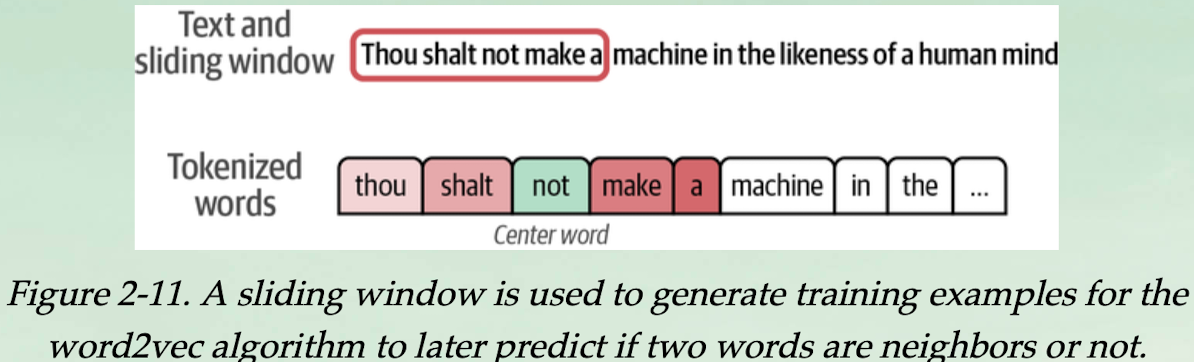
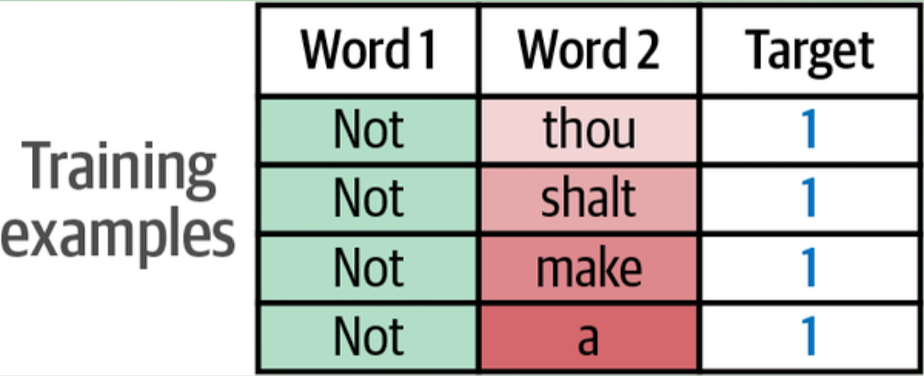

如果只有postive的例子，那模型会学习成只输出1.所以你必须添加相应的negative example。事实上negative example并不需要精心选取，只需要从dataset中随机采样即可。这是word2vec的核心概念之一：negative sampling， 另一个是skip-gram（也就是选取neighboring words）

在训练开始之前，把单词本中的所有token对应的embedding也就是向量值进行随机的初始化。然后训练的过程本质上是：使用两个token的embedding作为输入，模型输出他们的相关性决定他们是不是neighbors，然后根据之前sample的结果，使用机器学习技术对模型权重进行更新，大致如下图：

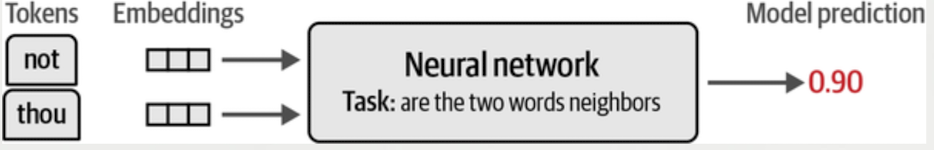


This idea of a model that takes two vectors and predicts if they have a certain relation is one of the most powerful ideas in machine learning, and time after time has proven to work very well with language models
后面chap10会详细介绍这个理念，以及它如何用于llm在特定任务上的优化


# Recommending songs by embeddings

In [5]:
import pandas as pd
from urllib import request

# Get the playlist dataset file
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Parse the playlist dataset file. Skip the first two lines as
# they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Remove playlists with only one song
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]

# Load song metadata
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')

In [5]:
print( 'Playlist #1:\n ', playlists[0], '\n')
print( 'Playlist #2:\n ', playlists[1])

Playlist #1:
  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43'] 

Playlist #2:
  ['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '104', '105', '106', '107', '47', '108', '109', '110', '111', '112', '113', '25', '63', '62', '114', '115', '84', '116', '117',

In [15]:
!pip install scipy==1.10.1

In [6]:
from gensim.models import Word2Vec

# Train our Word2Vec model
model = Word2Vec(
    playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4
)

In [ ]:
song_id = 2172

# Ask the model for songs similar to song #2172
model.wv.most_similar(positive=str(song_id))

[('2849', 0.9979680776596069),
 ('2640', 0.9964019060134888),
 ('3167', 0.9963980317115784),
 ('5549', 0.9959008693695068),
 ('2715', 0.9958351850509644),
 ('3117', 0.9954560995101929),
 ('2987', 0.9953479766845703),
 ('2881', 0.9951083660125732),
 ('2886', 0.9950577616691589),
 ('3094', 0.994985044002533)]

In [ ]:
print(songs_df.iloc[2172])

title     Fade To Black
artist        Metallica
Name: 2172 , dtype: object


In [7]:
import numpy as np

def print_recommendations(song_id):
    similar_songs = np.array(
        model.wv.most_similar(positive=str(song_id),topn=5)
    )[:,0]
    return  songs_df.iloc[similar_songs]

# Extract recommendations
print_recommendations(2172)

NameError: name 'model' is not defined

In [ ]:
print_recommendations(2172)

title     Fade To Black
artist        Metallica
Name: 2172 , dtype: object
['2849' '2640' '3167' '5549' '2715']


,title,artist
id,,
2849,Run To The Hills,Iron Maiden
2640,Red Barchetta,Rush
3167,Unchained,Van Halen
5549,November Rain,Guns N' Roses
2715,Rainbow In The Dark,Dio


In [ ]:
print_recommendations(842)

title     California Love (w\/ Dr. Dre & Roger Troutman)
artist                                              2Pac
Name: 842 , dtype: object
['5668' '413' '5661' '330' '886']


,title,artist
id,,
5668,How We Do (w\/ 50 Cent),The Game
413,If I Ruled The World (Imagine That) (w\/ Laury...,Nas
5661,Sweet Dreams,Beyonce
330,Hate It Or Love It (w\/ 50 Cent),The Game
886,Heartless,Kanye West
